## LAB2

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
dataset = pd.read_csv("dataset_cleaned.csv")

firstVisits = dataset.loc[dataset['Visit'] == 1]

print(firstVisits.loc[0:15, ['Subject ID', 'Group', 'Visit' , 'CDR']])

   Subject ID        Group  Visit  CDR
0   OAS2_0001  Nondemented      1  0.0
2   OAS2_0002     Demented      1  0.5
5   OAS2_0004  Nondemented      1  0.0
7   OAS2_0005  Nondemented      1  0.0
10  OAS2_0007     Demented      1  0.5
13  OAS2_0008  Nondemented      1  0.0
15  OAS2_0009     Demented      1  0.5


Sve osobe koje su u nekom kasnijem posjetu bile zabilježene kao 'Converted' se na kraju klasificiraju isto kao i osobe označene s 'Demented' od početka

In [4]:
dataset['Group'] = dataset['Group'].replace(['Converted'], ['Demented'])

print(dataset.loc[32:42,:])

    Unnamed: 0 Subject ID         MRI ID        Group  Visit  MR Delay M/F  \
32          32  OAS2_0017  OAS2_0017_MR5  Nondemented      5      2400   M   
33          33  OAS2_0018  OAS2_0018_MR1     Demented      1         0   F   
34          34  OAS2_0018  OAS2_0018_MR3     Demented      3       489   F   
35          35  OAS2_0018  OAS2_0018_MR4     Demented      4      1933   F   
36          36  OAS2_0020  OAS2_0020_MR1     Demented      1         0   M   
37          37  OAS2_0020  OAS2_0020_MR2     Demented      2       756   M   
38          38  OAS2_0020  OAS2_0020_MR3     Demented      3      1563   M   
39          39  OAS2_0021  OAS2_0021_MR1     Demented      1         0   M   
40          40  OAS2_0021  OAS2_0021_MR2     Demented      2      1164   M   
41          41  OAS2_0022  OAS2_0022_MR1  Nondemented      1         0   F   
42          42  OAS2_0022  OAS2_0022_MR2  Nondemented      2       828   F   

    Age  EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF  
32   86    

### STRING u INT

Da se moze provesti binarna klasifikacija  
Oznaka 'Grupa' je ono što će se pokušati pogoditi

In [8]:
group_map = {"Demented": 1, "Nondemented": 0}

dataset['Group'] = dataset['Group'].map(group_map)
dataset['M/F'] = dataset['M/F'].replace(['F','M'], [0,1])

print(dataset.loc[32:42,:])

    Unnamed: 0 Subject ID         MRI ID  Group  Visit  MR Delay  M/F  Age  \
32          32  OAS2_0017  OAS2_0017_MR5    NaN      5      2400    1   86   
33          33  OAS2_0018  OAS2_0018_MR1    NaN      1         0    0   87   
34          34  OAS2_0018  OAS2_0018_MR3    NaN      3       489    0   88   
35          35  OAS2_0018  OAS2_0018_MR4    NaN      4      1933    0   92   
36          36  OAS2_0020  OAS2_0020_MR1    NaN      1         0    1   80   
37          37  OAS2_0020  OAS2_0020_MR2    NaN      2       756    1   82   
38          38  OAS2_0020  OAS2_0020_MR3    NaN      3      1563    1   84   
39          39  OAS2_0021  OAS2_0021_MR1    NaN      1         0    1   72   
40          40  OAS2_0021  OAS2_0021_MR2    NaN      2      1164    1   76   
41          41  OAS2_0022  OAS2_0022_MR1    NaN      1         0    0   61   
42          42  OAS2_0022  OAS2_0022_MR2    NaN      2       828    0   64   

    EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF  
32    12  3.0  2

### Korelacija varijabli

Heatmap koji prikazuje ovisnost varijabli

C:\Users\kkrmpotic\AppData\Local\Temp\ipykernel_20952\1250471746.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr()


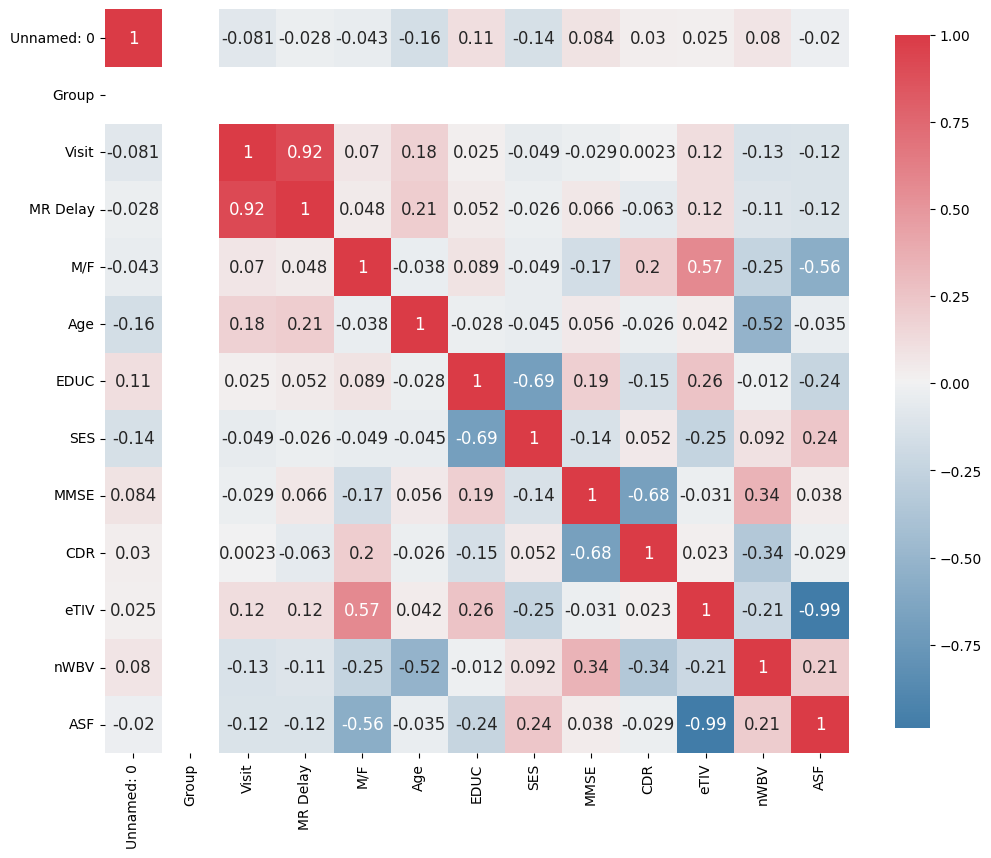

In [11]:
corr = dataset.corr()
_ , ax = plt.subplots( figsize =( 12 , 10 ) )
cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
_ = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, 
ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })